### 元素間距離のヒストグラムを描画

In [1]:
!pwd

/mnt/ssd_elecom_c2c_960gb/scripts/plot_speceis_dist_histgram


In [2]:
import os
import sys
import argparse

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# elements = {
#     "H": "Hydrogen",
#     "Li": "Lithium",
#     "Be": "Beryllium",
#     "B": "Boron",
#     "C": "Carbon",
#     "N": "Nitrogen",
#     "O": "Oxygen",
#     "F": "Fluorine",
#     "Na": "Sodium",
#     "Mg": "Magnesium",
#     "Al": "Aluminium",
#     "Si": "Silicon",
#     "P": "Phosphorus",
#     "S": "Sulfur",
#     "Cl": "Chlorine",
#     "K": "Potassium",
#     "Ca": "Calcium",
#     "Sc": "Scandium",
#     "Ti": "Titanium",
#     "V": "Vanadium",
#     "Cr": "Chromium",
#     "Mn": "Manganese",
#     "Fe": "Iron",
#     "Co": "Cobalt",
#     "Ni": "Nickel",
#     "Cu": "Copper",
#     "Zn": "Zinc",
#     "Ga": "Gallium",
#     "Ge": "Germanium",
#     "As": "Arsenic",
#     "Se": "Selenium",
#     "Br": "Bromine",
#     "Rb": "Rubidium",
#     "Sr": "Strontium",
#     "Y": "Yttrium",
#     "Zr": "Zirconium",
#     "Nb": "Niobium",
#     "Mo": "Molybdenum",
#     "Tc": "Technetium",
#     "Ru": "Ruthenium",
#     "Rh": "Rhodium",
#     "Pd": "Palladium",
#     "Ag": "Silver",
#     "Cd": "Cadmium",
#     "In": "Indium",
#     "Sn": "Tin",
#     "Sb": "Antimony",
#     "Te": "Tellurium",
#     "I": "Iodine",
#     "Xe": "Xenon",
#     "Cs": "Cesium",
#     "Ba": "Barium",
#     "La": "Lanthanum",
#     "Ce": "Cerium",
#     "Pr": "Praseodymium",
#     "Nd": "Neodymium",
#     "Pm": "Promethium",
#     "Sm": "Samarium",
#     "Eu": "Europium",
#     "Gd": "Gadolinium",
#     "Tb": "Terbium",
#     "Dy": "Dysprosium",
#     "Ho": "Holmium",
#     "Er": "Erbium",
#     "Tm": "Thulium",
#     "Yb": "Ytterbium",
#     "Lu": "Lutetium",
#     "Hf": "Hafnium",
#     "Ta": "Tantalum",
#     "W": "Tungsten",
#     "Re": "Rhenium",
#     "Os": "Osmium",
#     "Ir": "Iridium",
#     "Pt": "Platinum",
#     "Au": "Gold",
#     "Hg": "Mercury",
#     "Tl": "Thallium",
#     "Pb": "Lead",
#     "Bi": "Bismuth",
#     "Th": "Thorium",
#     "Pa": "Protactinium",
#     "U": "Uranium",
#     "Np": "Neptunium",
#     "Pu": "Plutonium",
#     "Am": "Americium",
#     "Cm": "Curium",
#     "Bk": "Berkelium",
#     "Cf": "Californium",
#     "Es": "Einsteinium",
#     "Fm": "Fermium",
#     "Md": "Mendelevium",
#     "No": "Nobelium",
#     "Lr": "Lawrencium",
#     "Rf": "Rutherfordium",
#     "Db": "Dubnium",
#     "Sg": "Seaborgium",
#     "Bh": "Bohrium",
#     "Hs": "Hassium",
#     "Mt": "Meitnerium",
#     "Ds": "Darmstadtium",
#     "Rg": "Roentgenium",
#     "Cn": "Copernicium",
#     "Nh": "Nihonium",
#     "Fl": "Flerovium",
#     "Mc": "Moscovium",
#     "Lv": "Livermorium",
#     "Ts": "Tennessine",
#     "Og": "Oganesson",
#     "Nw": "Nihonwium",
#     "Kx": "Kanixium",
#     "Xy": "Xylophonium",
#     "Zz": "Zizzonium",
#     "Wt": "Watsonium",
#     "El": "Elementium",
#     "Py": "Pythonium",
#     "Jp": "Japanium",
#     "Rb": "Rubidium",
#     "Px": "Phoenixium",
#     "Az": "Azureium",
#     "Qt": "Quantium",
#     "Mg": "Magnesium",
#     "Al": "Aluminum",
#     "Si": "Silicon",
#     "P": "Phosphorus",
#     "S": "Sulfur",
#     "Cl": "Chlorine",
#     "K": "Potassium",
#     "Ar": "Argon",
#     "Ca": "Calcium",
#     "Sc": "Scandium",
#     "Ti": "Titanium",
#     "V": "Vanadium",
#     "Cr": "Chromium",
#     "Mn": "Manganese",
#     "Fe": "Iron",
#     "Ni": "Nickel",
#     "Co": "Cobalt",
#     "Cu": "Copper",
#     "Zn": "Zinc",
#     "Ga": "Gallium",
#     "Ge": "Germanium",
#     "As": "Arsenic",
#     "Se": "Selenium",
#     "Br": "Bromine",
#     "Kr": "Krypton",
#     "Rb": "Rubidium",
#     "Sr": "Strontium",
#     "Y": "Yttrium",
#     "Zr": "Zirconium",
#     "Nb": "Niobium",
#     "Mo": "Molybdenum",
#     "Tc": "Technetium",
#     "Ru": "Ruthenium",
#     "Rh": "Rhodium",
#     "Pd": "Palladium",
#     "Ag": "Silver",
#     "Cd": "Cadmium",
#     "In": "Indium",
#     "Sn": "Tin",
#     "Sb": "Antimony",
#     "Te": "Tellurium",
#     "I": "Iodine",
#     "Xe": "Xenon",
#     "Cs": "Cesium",
#     "Ba": "Barium",
#     "La": "Lanthanum",
#     "Ce": "Cerium",
#     "Pr": "Praseodymium",
#     "Nd": "Neodymium",
#     "Pm": "Promethium",
#     "Sm": "Samarium",
#     "Eu": "Europium",
#     "Gd": "Gadolinium",
#     "Tb": "Terbium",
#     "Dy": "Dysprosium",
#     "Ho": "Holmium",
#     "Er": "Erbium",
#     "Tm": "Thulium",
#     "Yb": "Ytterbium",
#     "Lu": "Lutetium",
#     "Hf": "Hafnium",
#     "Ta": "Tantalum",
#     "W": "Tungsten",
#     "Re": "Rhenium",
#     "Os": "Osmium",
#     "Ir": "Iridium",
#     "Pt": "Platinum",
#     "Au": "Gold",
#     "Hg": "Mercury",
#     "Tl": "Thallium",
#     "Pb": "Lead",
#     "Bi": "Bismuth",
#     "Po": "Polonium",
#     "At": "Astatine",
#     "Rn": "Radon",
#     "Fr": "Francium",
#     "Ra": "Radium",
#     "Ac": "Actinium",
#     "Th": "Thorium",
#     "Pa": "Protactinium",
#     "U": "Uranium",
#     "Np": "Neptunium",
#     "Pu": "Plutonium",
#     "Am": "Americium",
#     "Cm": "Curium",
#     "Bk": "Berkelium",
#     "Cf": "Californium",
#     "Es": "Einsteinium",
#     "Fm": "Fermium",
#     "Md": "Mendelevium",
#     "No": "Nobelium",
#     "Lr": "Lawrencium",
#     "Rf": "Rutherfordium",
#     "Db": "Dubnium",
#     "Sg": "Seaborgium",
#     "Bh": "Bohrium",
#     "Hs": "Hassium",
#     "Mt": "Meitnerium",
#     "Ds": "Darmstadtium",
#     "Rg": "Roentgenium",
#     "Cn": "Copernicium",
#     "Nh": "Nihonium",
#     "Fl": "Flerovium",
#     "Mc": "Moscovium",
#     "Lv": "Livermorium",
#     "Ts": "Tennessine",
#     "Og": "Oganesson"
# }


In [3]:
# npy_file_name = 'Al_Cl_dist_1d_list.npy'
# npy_file_name = 'B_F_dist_1d_list.npy'
# npy_file_name = 'B_H_dist_1d_list.npy'
# npy_file_name = 'Br_O_dist_1d_list.npy'
# npy_file_name = 'Cl_O_dist_1d_list.npy'
# npy_file_name = 'C_N_dist_1d_list.npy'
# npy_file_name = 'I_O_dist_1d_list.npy'
# npy_file_name = 'N_O_dist_1d_list.npy'
# npy_file_name = 'Mn_O_dist_1d_list.npy'
# npy_file_name = 'O_H_dist_1d_list.npy'
# npy_file_name = 'S_O_dist_1d_list.npy'
# npy_file_name = 'Se_O_dist_1d_list.npy'
# npy_file_name = 'Pt_F_dist_1d_list.npy'
# npy_file_name = 'Pt_Cl_dist_1d_list.npy'
# npy_file_name = 'Pt_Br_dist_1d_list.npy'
npy_file_name = 'Pt_I_dist_1d_list.npy'



central_atom_symbol = npy_file_name.split('_')[0]
neighboring_atom_symbol = npy_file_name.split('_')[1]

In [4]:
some_speceis_dist_1d_list_loaded = np.load(npy_file_name, allow_pickle=True)

In [5]:
def mk_fig_histgram(array, figsize, xmax):
    """
    This func() makes a figure of histgram about distance between some species.
    
    Usage:
    ------
    mk_fig_histgram(some_speceis_dist_1d_list_loaded, figsize=5, xmax=2.0)
    
    Parameters:
    -----------
    array: ndarray 
    figsize: int or float
    xmax: int or float
    
    Outputs:
    --------
    figures: .png(dpi=100, 200, 300), .eps, .pdf
    """
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(figsize, figsize))
    sns.histplot(array[array <= xmax], 
                 ax=axes, 
                 label=f'{elements[central_atom_symbol]}-{elements[neighboring_atom_symbol]} distance',
                 color='lightgray', 
                 # alpha=0.4,
                 edgecolor=None,)
    # タイトルの設定
    if figsize == 5:
        fontsize = 10
    if figsize == 6:
        fontsize = 12
    axes.set_title(f'Histgram of distances between {elements[central_atom_symbol]} and {elements[neighboring_atom_symbol]} under {xmax}Å',
                   y=1.05, 
                   fontsize=fontsize,)
    # 軸ラベルの設定
    axes.set_xlabel('Distance(Å)', fontsize=15)
    axes.set_ylabel('Count', fontsize=15)
    axes.xaxis.set_label_coords(0.5, -0.08)  # x軸ラベルの位置を調整
    axes.yaxis.set_label_coords(-0.11, 0.5)  # y軸ラベルの位置を調整
    # x軸の範囲設定
    axes.set_xlim(right=xmax)
    # y軸を指数表示
    axes.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    # 凡例の設定
    axes.legend(loc='upper left',bbox_to_anchor=(0.01, 0.99))  # 凡例を表示
    # save
    f_name = f'figure/{central_atom_symbol}{neighboring_atom_symbol}/under{xmax}/size_{figsize}_{figsize}/'
    None if os.path.exists(f_name) else os.makedirs(f_name)
    # fig.savefig(f'{f_name}/Histgram_of_carbon-oxygen_bond_distances', format='png')
    fig.savefig(f'{f_name}/Histgram_of_{elements[central_atom_symbol]}-{elements[neighboring_atom_symbol]}_bond_distances_under{xmax}_300dpi_s{figsize}.png', dpi=300)
    fig.savefig(f'{f_name}/Histgram_of_{elements[central_atom_symbol]}-{elements[neighboring_atom_symbol]}_bond_distances_under{xmax}_200dpi_s{figsize}.png', dpi=200)
    fig.savefig(f'{f_name}/Histgram_of_{elements[central_atom_symbol]}-{elements[neighboring_atom_symbol]}_bond_distances_under{xmax}_100dpi_s{figsize}.png', dpi=100)
    # fig.savefig(f'{f_name}/Histgram_of_carbon-oxygen_bond_distances', format='pdf')
    fig.savefig(f'{f_name}/Histgram_of_{elements[central_atom_symbol]}-{elements[neighboring_atom_symbol]}_bond_distances_under{xmax}_s{figsize}.pdf')
    # .eps形式で保存
    fig.savefig(f'{f_name}/Histgram_of_{elements[central_atom_symbol]}-{elements[neighboring_atom_symbol]}_bond_distances_under{xmax}_s{figsize}.eps')
    # show
    plt.show()

### figsize=5, xmax=5.0の場合

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


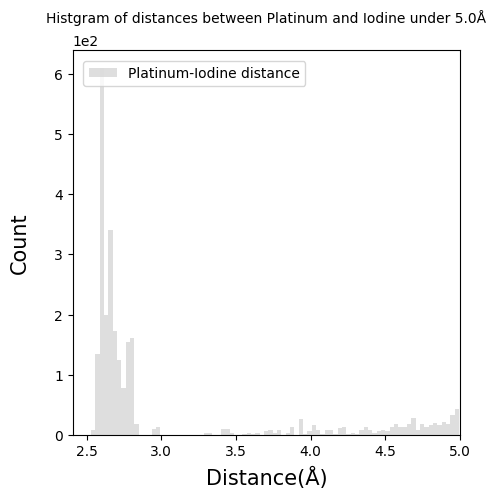

In [6]:
mk_fig_histgram(some_speceis_dist_1d_list_loaded, figsize=5, xmax=5.0)

### figsize=5, xmax=4.0の場合

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


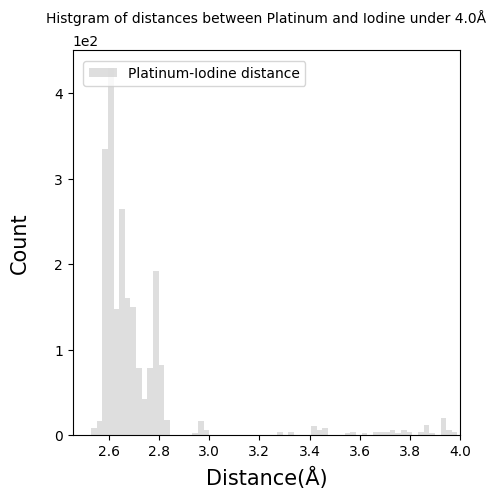

In [7]:
mk_fig_histgram(some_speceis_dist_1d_list_loaded, figsize=5, xmax=4.0)

### figsize=5, xmax=3.0の場合

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


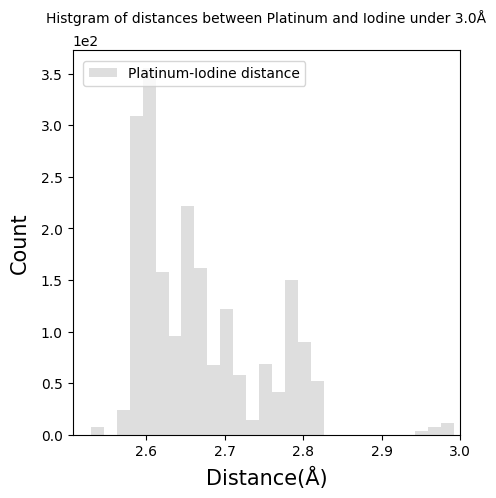

In [8]:
mk_fig_histgram(some_speceis_dist_1d_list_loaded, figsize=5, xmax=3.0)

### figsize=5, xmax=2.0の場合

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


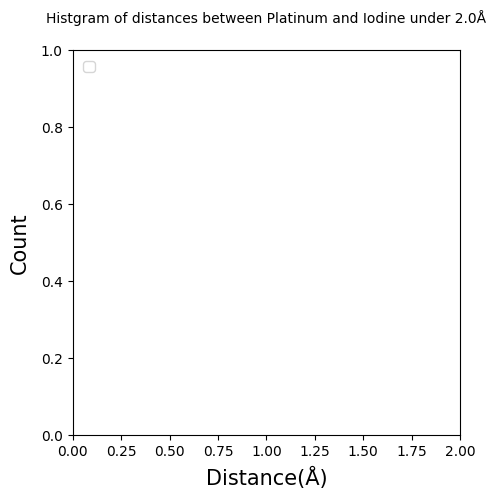

In [9]:
mk_fig_histgram(some_speceis_dist_1d_list_loaded, figsize=5, xmax=2.0)

### figsize=6, xmax=5.0の場合

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


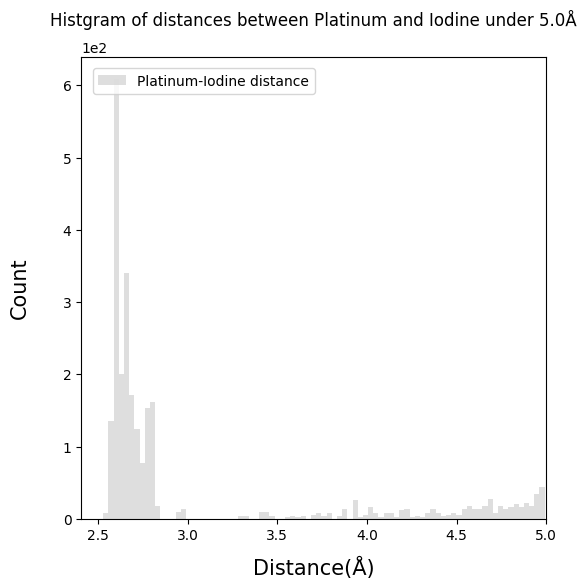

In [10]:
mk_fig_histgram(some_speceis_dist_1d_list_loaded, figsize=6, xmax=5.0)

### figsize=6, xmax=4.0の場合

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


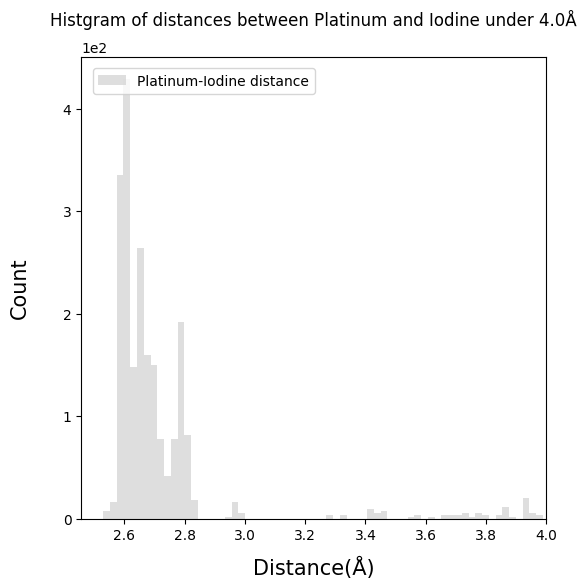

In [11]:
mk_fig_histgram(some_speceis_dist_1d_list_loaded, figsize=6, xmax=4.0)

### figsize=6, xmax=3.0の場合

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


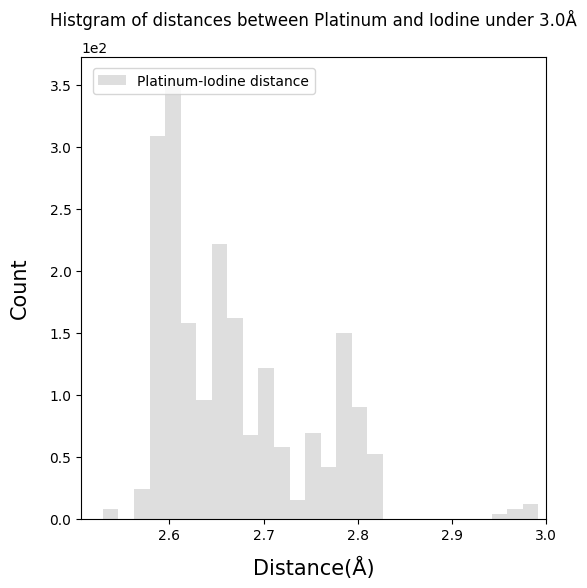

In [12]:
mk_fig_histgram(some_speceis_dist_1d_list_loaded, figsize=6, xmax=3.0)

### figsize=6, xmax=2.0の場合

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


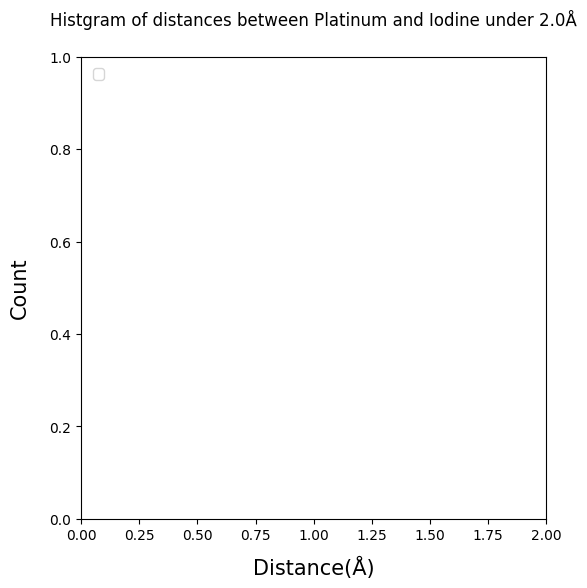

In [13]:
mk_fig_histgram(some_speceis_dist_1d_list_loaded, figsize=6, xmax=2.0)